In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Visualizing Things With SeaBorn

Seaborn is a Python data visualization library based on matplotlib, the granddaddy of plotting libraries in Python. Matplot lib is quite annoying to use, so there are many libraries built on top of it to make it easier to use and suit specific purposes. Seaborn is one of the popular ones, and one that we'll rely on quite a bit. 

<b>Note:</b> the specific plot type of library generally doesn't matter - we can call plot(), we can use matplotlib, we can use seaborn, or something else. Seaborn is good and easy, and it'll generally do what we want, so we'll use that, but it doesn't matter much. 

<b>Big But Minor Note:</b> some of the details here, especially around when to 'show' a chart (and if manually doing it is required) are a little finicky with respect to their use in notebooks, and the specific environment of notebook. This is minor, and has to do with the way notebooks work (show results now) vs how code normally runs (generate the output and spit it out to the destination). In 99.9% of cases this doesn't matter and results in little more than us not having to use show(). 

## Display and Result Side Note

This note is just for context, but I think it is something that can sometimes be confusing when you first encounter it. Generally, when you run some code, that output gets sent or 'piped' somewhere - when running a normal py file that is the console, when running a notebook that is the notebook. Since seaborn is a plotting library, you'll see some references to 'showing' the plot, but we can mainly just ignore that. The notebook basically takes over that part of the process, and will automatically display the plots as they arise. If this was meaningless junk, just ignore it, and know that showing plots is not something you need generally need to worry about.

In [12]:
df = pd.read_csv("../data/Salary_Survey.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data/Salary_Survey.csv'

## Seabasics

Making basic plots with Seaborn is easy, and most common plots are intuitive. The documentation for seaborn is good, usually with some examples and explanations. 

### Submitting Data

Seaborn is built to work with pandas dataframes, so we'll use those. In general, we want to manipulate and explore the data in the dataframe format before doing anything to it. We pass data to seaborn functions as the data parameter, and the column names as strings. In most places, we want to provide the data for the key arguments like this:
<ul>
    <li>data=df</li>
    <li>x='column_name'</li>
    <li>y='column_name'</li>
    <li>hue='column_name'</li>
</ul>
The hue argument will control the color using whatever column we pass to it - with discreet data we'll get different colors for different values, and with continuous data we'll get a gradient.

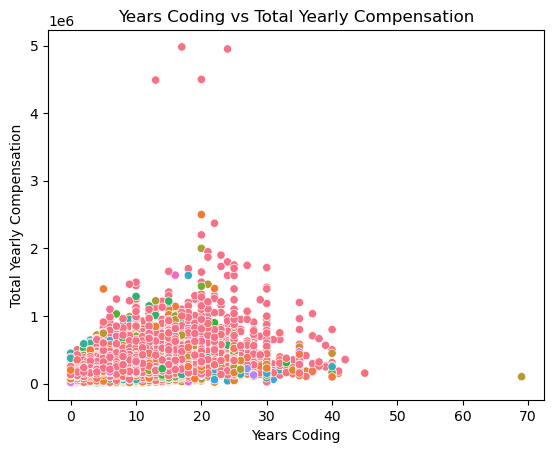

In [ ]:
data_used = df
x_used = "yearsofexperience"
y_used = "totalyearlycompensation"
hue_used = "company"
title = "Years Coding vs Total Yearly Compensation"
xlabel = "Years Coding"
ylabel = "Total Yearly Compensation"

sns.scatterplot(data=data_used, x=x_used, y=y_used, hue=hue_used, legend=False)
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

### Plotting in Grids

One thing that we can use all over, not just when using seaborn is to plot in grids, so we can do things like make individual visuals display beside each other. The most common way to do this is to use matplotlib's subplots() function, which will create a grid of plots. 

#### Subplots

The subplots() function will create a grid of plots, and return the figure and axes objects. We can then use these to plot on. Creating the subplots requires the number of rows and columns, and optionally the size of the figure. The inputs are:
<ul>
<li> Rows: the number of rows in the grid</li>
<li> Cols: the number of columns in the grid</li>
<li> figsize: the size of the figure</li>
</ul>

Once created, we get two items returned - the figure and the axes. The figure is the overall plot, and the axes are the individual plots. Each plot is located in the grid at [ROW, COL], and we can specify which axes to plot on by passing the axes object to the plot function. This is something we've seen before in passing, it is very common. 

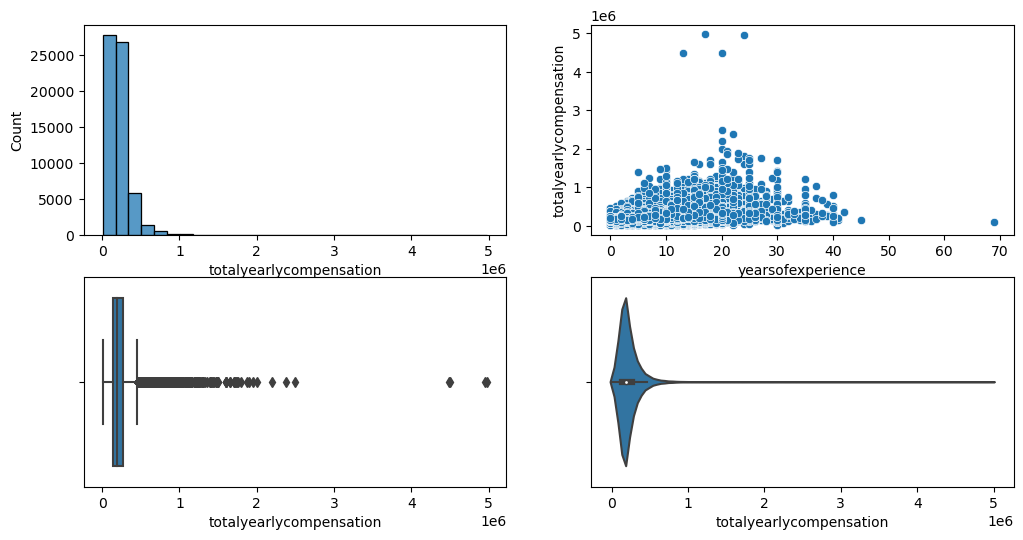

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(12,6))
sns.histplot(df['totalyearlycompensation'], bins=30, ax=ax[0,0])
sns.scatterplot(x='yearsofexperience', y='totalyearlycompensation', data=df, ax=ax[0,1])
sns.boxplot(data=df, x='totalyearlycompensation', ax=ax[1,0])
sns.violinplot(data=df, x='totalyearlycompensation', ax=ax[1,1])
plt.show()

## Adding Labels and Such

For most plots, we probably want to decorate them a little bit with things like titles and legends. Some of this may be automatic with certain chart types, but we can always add it manually.

### .Plt Options

Several options for style are available in the plt module, which is basically a 'settings' module for matplotlib based things. 

<b>Big Note:</b> note for many things in Seaborn there might be more than one thing to do something the same or similarly. This is normally because Seaborn is built on top of matplotlib, so for anything Seaborn makes easier, there is likely some matplotlib way to do it directly, and if you look for examples you may see people doing it that way. The biggest risk here is confusion, again it doesn't matter much to the end result, but we want to avoid confusion. 

Text(0.5, 0, '')

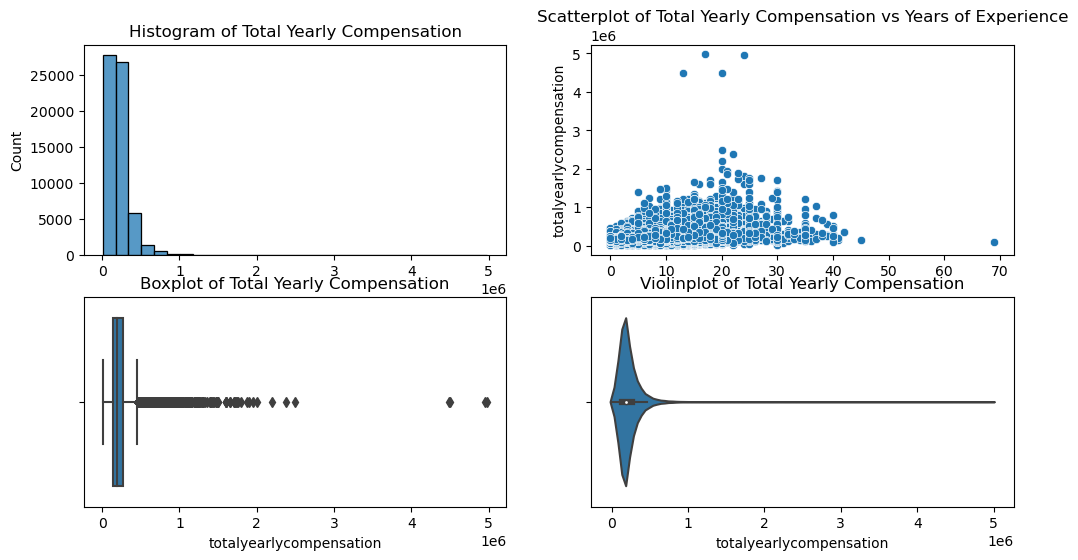

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(12,6))
sns.histplot(df['totalyearlycompensation'], bins=30, ax=ax[0,0])
sns.scatterplot(x='yearsofexperience', y='totalyearlycompensation', data=df, ax=ax[0,1])
sns.boxplot(data=df, x='totalyearlycompensation', ax=ax[1,0])
sns.violinplot(data=df, x='totalyearlycompensation', ax=ax[1,1])

ax[0,0].set_title('Histogram of Total Yearly Compensation')
ax[0,1].set_title('Scatterplot of Total Yearly Compensation vs Years of Experience')
ax[1,0].set_title('Boxplot of Total Yearly Compensation')
ax[1,1].set_title('Violinplot of Total Yearly Compensation')

ax[0,0].set_xlabel("")
ax[0,1].set_xlabel("")

#### Grid Checks

Plotting things in grids is very common and usually pretty easy as long as we can keep track of the variables we're using and remember what goes where. If things don't display though, sometimes it can be hard to figure out what went wrong. One thing that we can use to check where our mistake originates is to use the has_data() function on the axes object - this can let us see if we've passed the data and it isn't displaying, or if we haven't loaded it with data at all. Personally, I find this helpful at times because I can verify that whatever I did to load and process the data was successful, allowing me to focus on what plotting thing I made a mistake on. 

In [ ]:
print( ax[0,0].has_data() )
print( ax[0,1].has_data() )

True
True


## Seaborn Facets and Grids

Seaborn has a lot of built-in functionality for making grids of plots, and for making facets. Facets are basically a grid of plots, where each plot is a subset of the data. This is a very common way to visualize data, and Seaborn makes it easy. Like most other things, we don't <i>have</i> to use this, but its an option. 

In seaborn, the facet is called with both the data what we want along each axis (there are some variations of the details here, check the docs for more). The data will be split, making each plot is a subset of the data - that which matches the two segments that intersect at that plot. We can also specify what to fill the spots with by mapping them to the facet that we've made. 

This is another tool that can be good in bulk data exploration. The idea being that we can make a grid of plots, and then look at them all at once. This can be good for getting a sense of the data, and for looking for patterns. This works much better when we have a small number of categories in the items we are using for the axes. 

In [ ]:
df_facet = sns.load_dataset('penguins')
df_facet.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

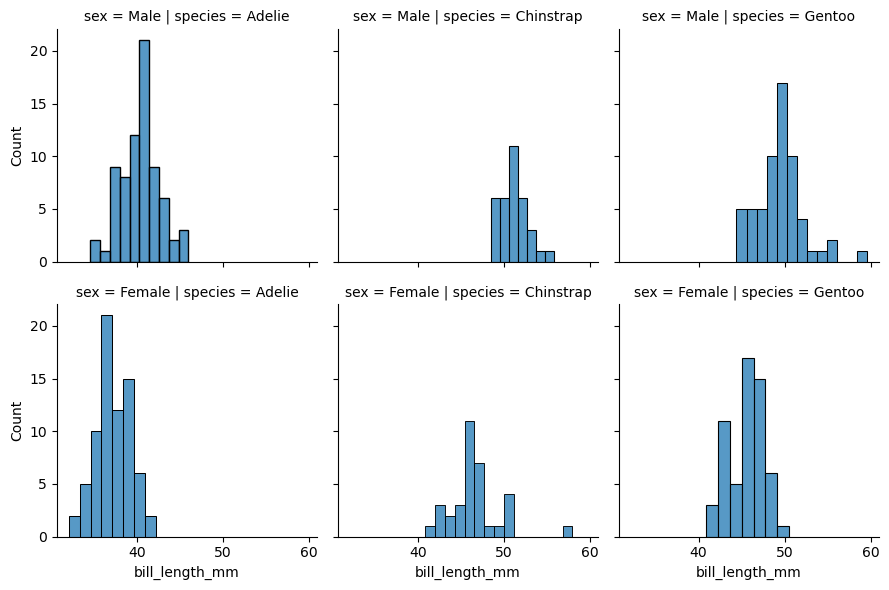

In [ ]:
sb_facet = sns.FacetGrid(data=df_facet, col='species', row='sex')
sb_facet.map(sns.histplot, 'bill_length_mm')

### Anti-Annoyance Note

The facets can cause a bit of annoyance and confusion because seaborn has some annoyingly similarly labeled things that work slightly differently. Facets are one of them and if you look to the docs you may find examples such as a displot and a distplot. These things do the same thing, but they are different in that one depends on having a facet grid and the other doesn't, potentially causing errors. 

tl;dr double-check the plot type if you get an error, there may be a similar one that does/doesn't require a facet grid.

## Common Seaborn Plots

In doing machine learning we commonly reuse several plot types over and over, including some that aren't super common in most other scenarios. 

### Distributions

One of the first things we normally want to do is to look at the distribution of the data. 

#### Numerical Distributions

For numerical distributions, there are many options, this is really the centre of making charts in the universe of mathematics. I personally like using a kde plot to get a quick look, but histograms, box, and violin plots can also be used. There are also several variations of all these, for example, a histplot can add a line if you want - the bases are starting points, and we could change almost anything to customize them if needed. 

<Axes: xlabel='totalyearlycompensation'>

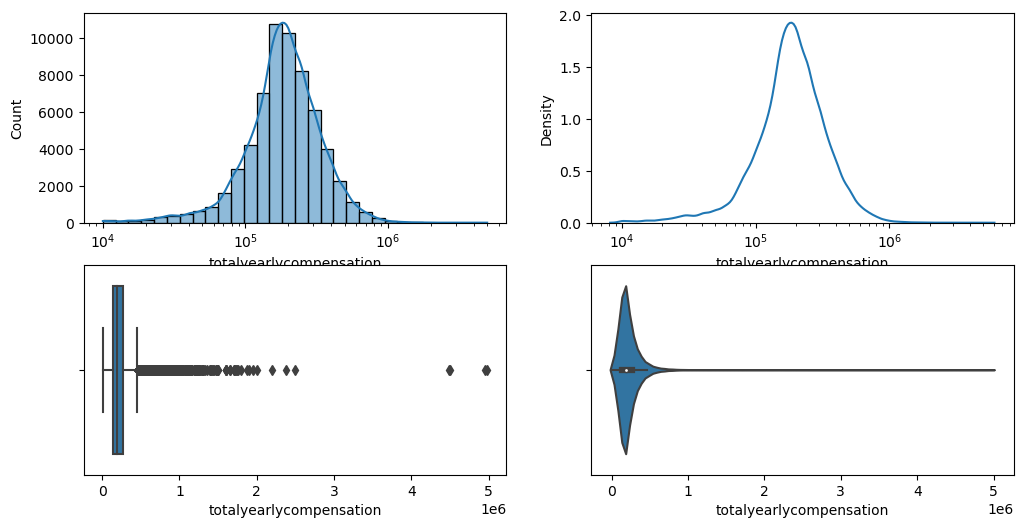

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(12,6))
sns.histplot(df['totalyearlycompensation'], bins=30, ax=ax[0,0], kde=True, log_scale=True)
sns.kdeplot(data=df, x='totalyearlycompensation', ax=ax[0,1], log_scale=True)
sns.boxplot(data=df, x='totalyearlycompensation', ax=ax[1,0])
sns.violinplot(data=df, x='totalyearlycompensation', ax=ax[1,1])

#### Categorical Distributions

We can also use different tools to look at categorical data. The most common is a countplot, which will show the number of occurrences of each category. We can also use a barplot, which will show the mean of a numerical column for each category.

[Text(0, 0, 'Amazon'),
 Text(1, 0, 'Microsoft'),
 Text(2, 0, 'Comcast'),
 Text(3, 0, 'WP Engine'),
 Text(4, 0, 'Google'),
 Text(5, 0, 'Mutual of Omaha'),
 Text(6, 0, 'ServiceNow'),
 Text(7, 0, 'Spotify'),
 Text(8, 0, 'Best Buy'),
 Text(9, 0, 'SAP'),
 Text(10, 0, 'Goldman Sachs'),
 Text(11, 0, 'Apple'),
 Text(12, 0, 'L3Harris Technologies'),
 Text(13, 0, 'Convoy'),
 Text(14, 0, 'ASML'),
 Text(15, 0, 'Bloomberg'),
 Text(16, 0, 'eBay'),
 Text(17, 0, 'USAA'),
 Text(18, 0, 'Xing'),
 Text(19, 0, 'Asana'),
 Text(20, 0, 'Facebook'),
 Text(21, 0, 'Ticketmaster'),
 Text(22, 0, 'IBM'),
 Text(23, 0, 'Wayfair'),
 Text(24, 0, 'Intuit'),
 Text(25, 0, 'Snap'),
 Text(26, 0, 'Intel'),
 Text(27, 0, 'Capital One'),
 Text(28, 0, 'ByteDance'),
 Text(29, 0, 'Oracle'),
 Text(30, 0, 'Electronic Arts'),
 Text(31, 0, 'Scribd'),
 Text(32, 0, 'Informatica'),
 Text(33, 0, 'Airbnb'),
 Text(34, 0, 'axon'),
 Text(35, 0, 'Cloudera')]

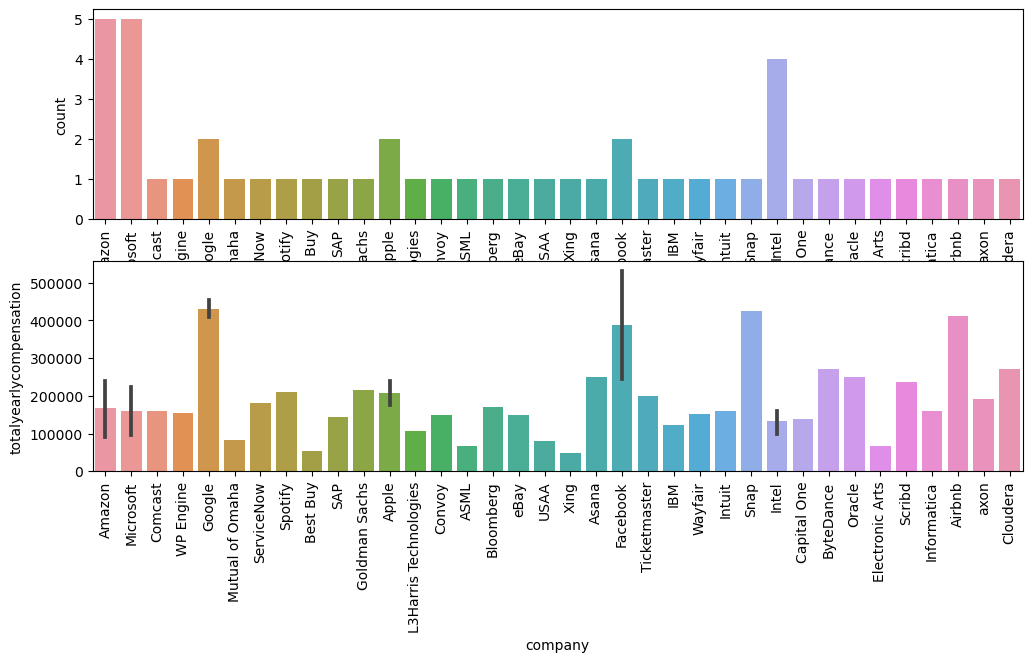

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(12,6))
samp_subset = df.sample(50)

sns.countplot(data=samp_subset, x='company', ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
sns.barplot(data=samp_subset, x='company', y='totalyearlycompensation', ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

### Relationships

With any pair of two variables in our dataset we can explore the relationship between them. For relationships, we need to choose our tool based on the type of data provided - numerical vs categorical. 

#### Numerical vs Numerical

When we have numerical data, a scatterplot is a great choice. 

<Axes: xlabel='yearsofexperience', ylabel='totalyearlycompensation'>

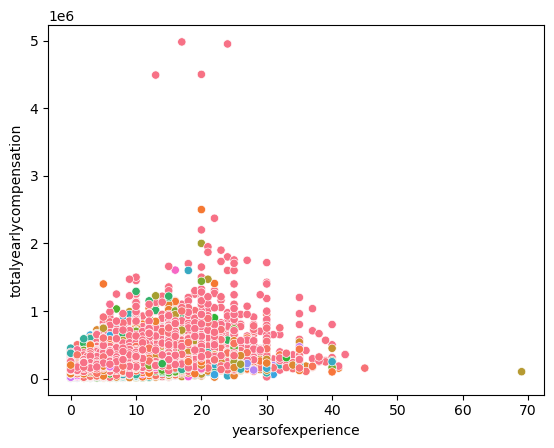

In [ ]:
sns.scatterplot(data=df, x='yearsofexperience', y='totalyearlycompensation', hue='company',legend=False)


In [ ]:
from ipywidgets import widgets

def plot_scatter(data, x, y, hue, title, xlabel, ylabel):
    sns.scatterplot(data=data, x=x, y=y, hue=hue, legend=False)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

col_choices = ['yearsofexperience', 'totalyearlycompensation', 'basesalary']

x_choice = widgets.Dropdown(
    options=col_choices,
    description='X-axis'
)
y_choice = widgets.Dropdown(
    options= col_choices,
    description='Y-axis'
)
hue_choice = widgets.Dropdown(
    options=col_choices,
    description='Hue'
)

#widgets.interactive(plot_scatter, data=df.sample(50), 
#                    x=x_choice, y=y_choice, hue=hue_choice, title=widgets.fixed('Scatterplot'), 
#                    xlabel=widgets.fixed('X-axis'), ylabel=widgets.fixed('Y-axis'))

#### Categorical vs Numerical

When we have a categorical variable and a numerical variable, we can use a boxplot or a violin plot. These will show the distribution of the numerical variable for each category.

[Text(0, 0, 'Facebook'),
 Text(1, 0, 'Apple'),
 Text(2, 0, 'Amazon'),
 Text(3, 0, 'Google'),
 Text(4, 0, 'Netflix')]

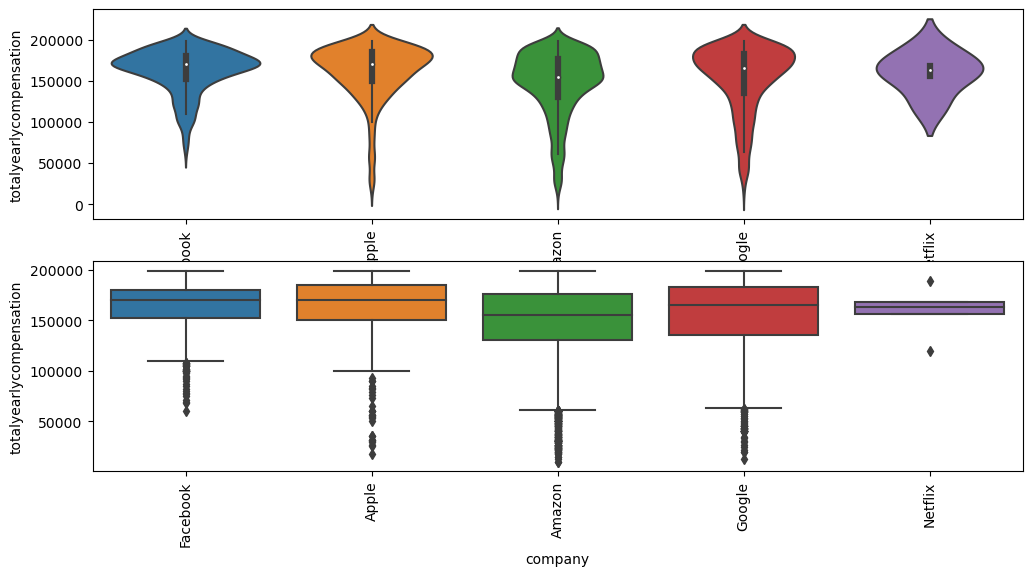

In [ ]:
df["isFAANG"] = df["company"].apply(lambda x: 1 if x in ["Facebook", "Apple", "Amazon", "Netflix", "Google"] else 0)
fig, ax = plt.subplots(2,1, figsize=(12,6))

df_tmp = df[df["isFAANG"] == 1]
df_tmp = df_tmp[df_tmp["totalyearlycompensation"] < 200000]
sns.violinplot(data=df_tmp, x='company', y='totalyearlycompensation', ax=ax[0])
sns.boxplot(data=df_tmp, x='company', y='totalyearlycompensation', ax=ax[1])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

### ML Specific

There are a few plots that are really useful for machine learning, so we use them frequently, such as:
<ul>
    <li> Pairplot: a grid of scatterplots for all pairs of columns</li>
        <ul>
        <li> I like this one for an all-at-once view of data exploration, and it is very good at letting us see the 'basics' and know where to go next. </li>
        </ul>
    <li> Heatmap: a grid of colored squares, useful for correlation matrices</li>
    <li> Countplot: a bar plot of counts of a categorical variable</li>
</ul>

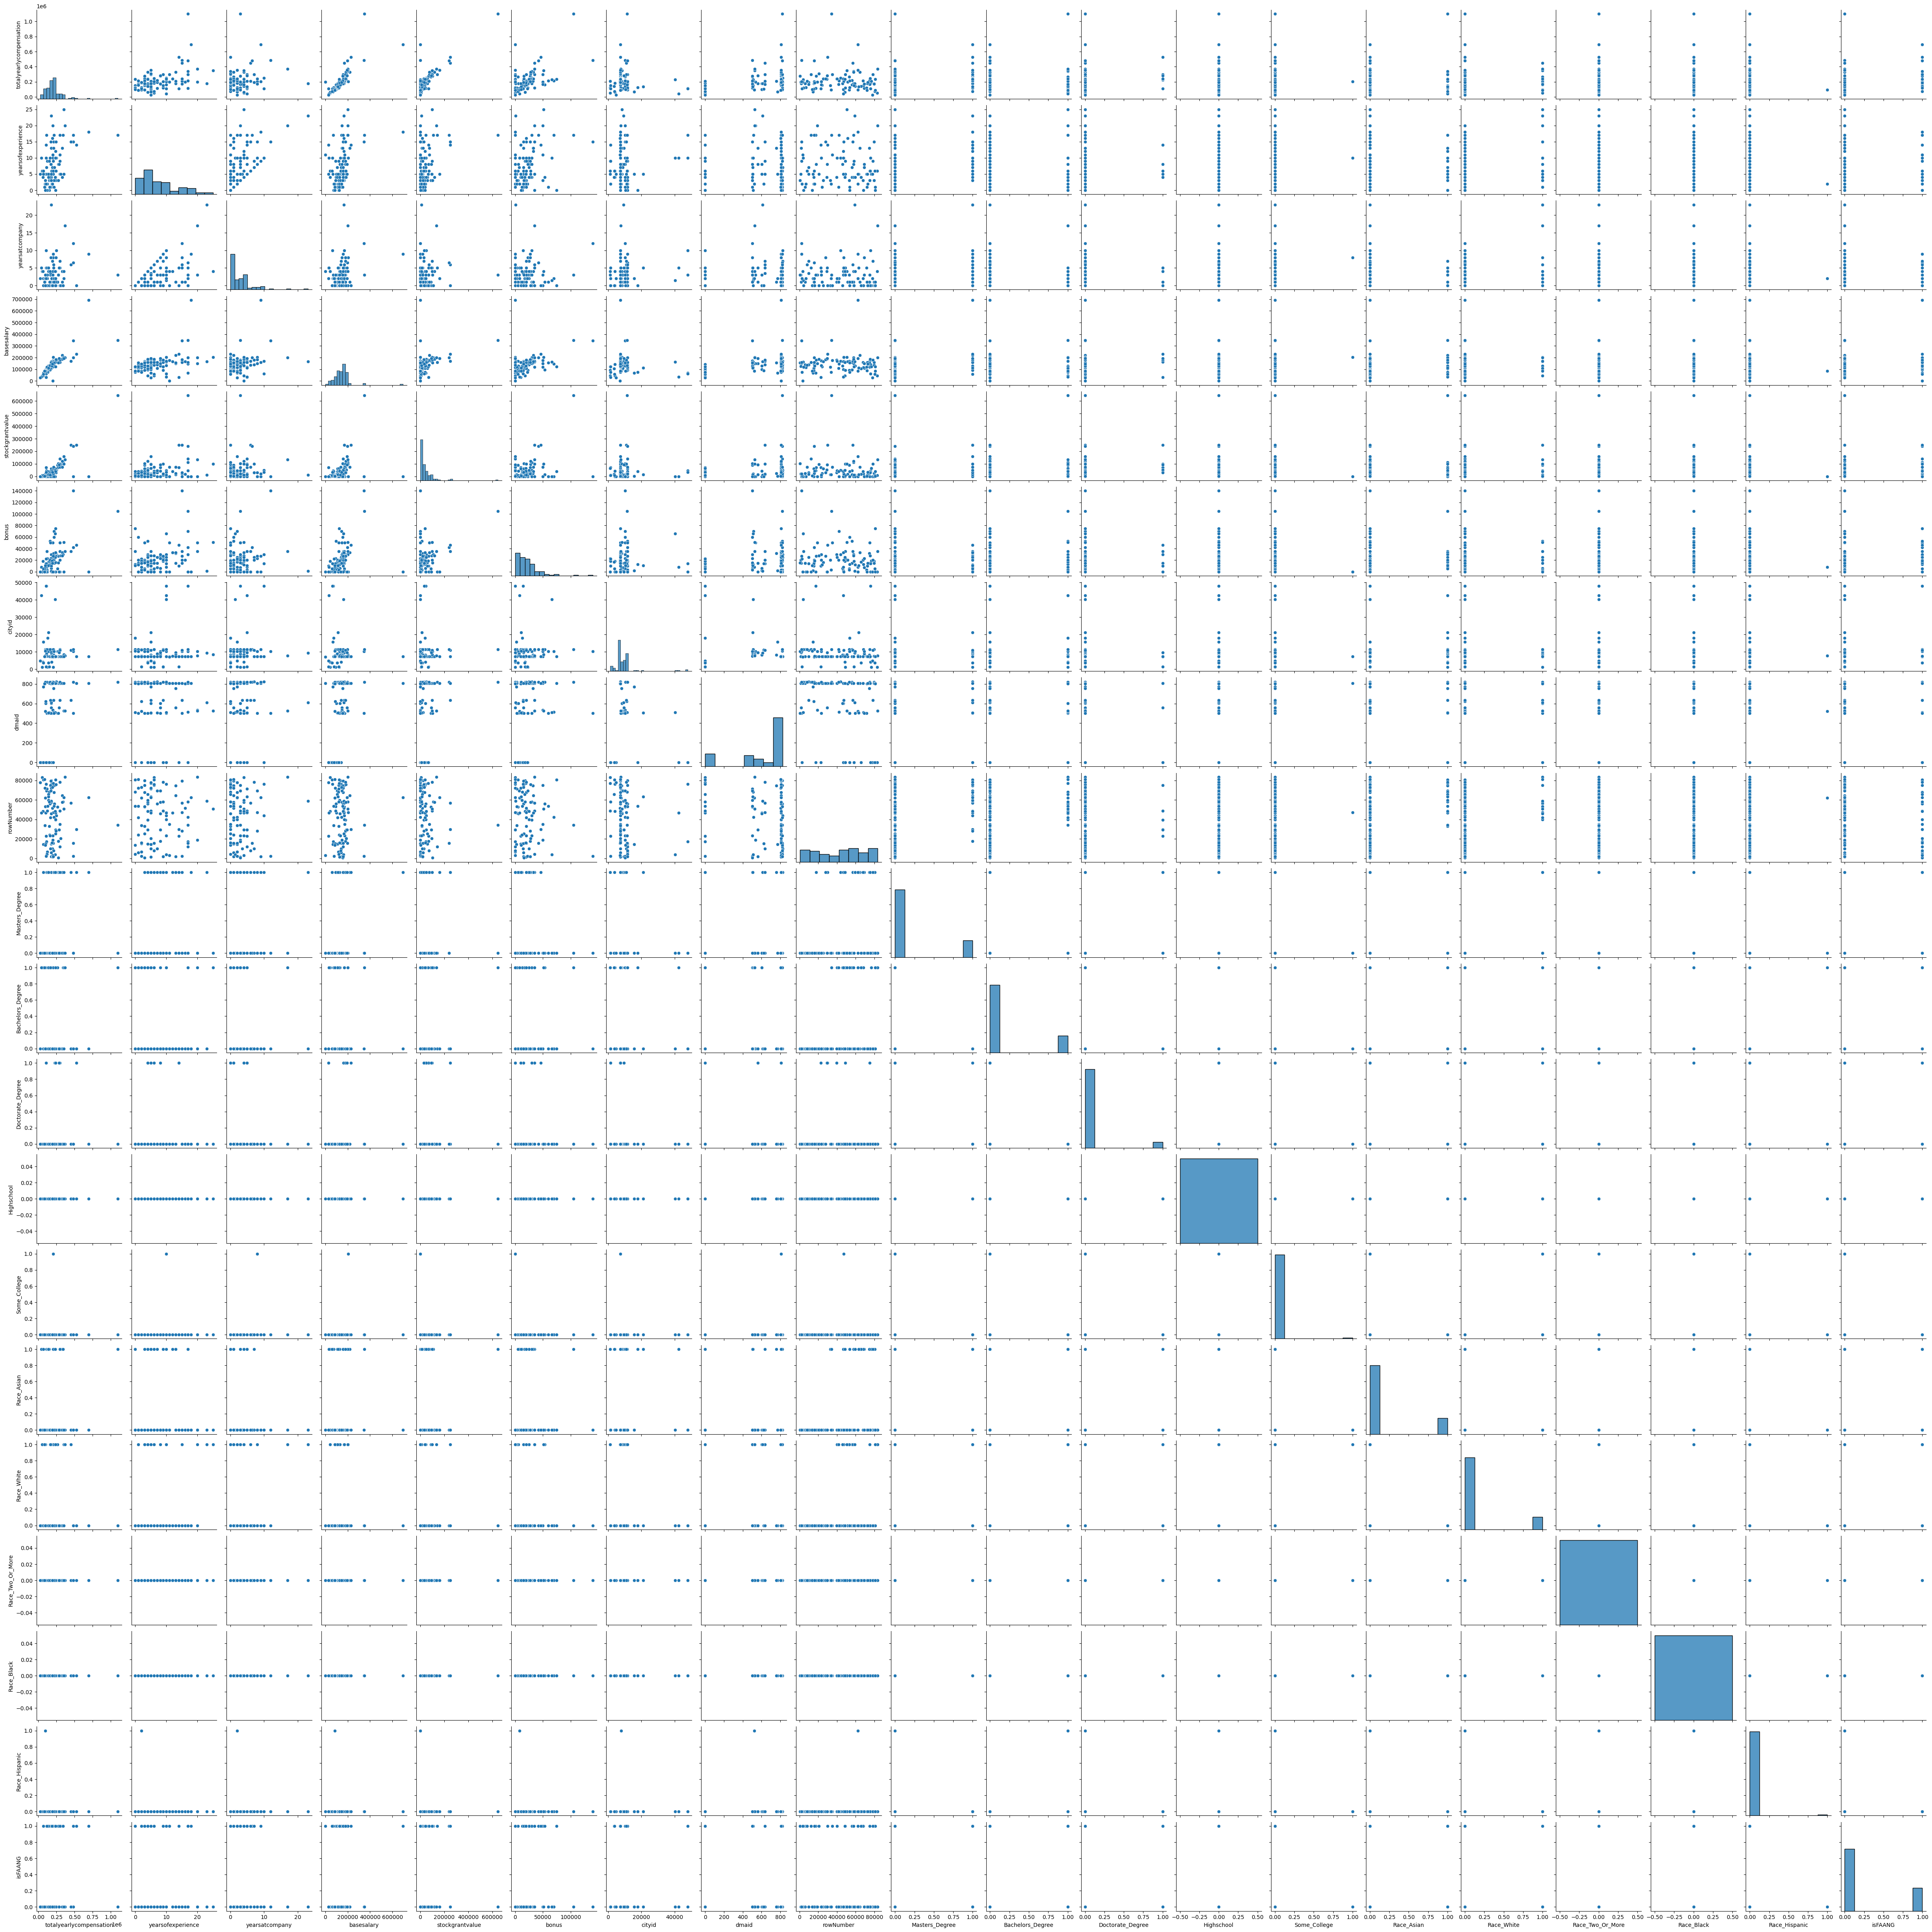

In [ ]:
sns.pairplot(df.sample(100))

### Separating Before Plotting

Another common thing to do in machine learning is to separate or otherwise distinguish between different subsegments of our data, such as looking at T/F differently if we are doing a classification problem. We have several options to do this:
<ul>
<li> Hue - in many plots we can use the hue parameter to color by a column. </li>
<li> Overlapping Plots - we can split the data and plot each on the same plot. </li>
<li> FacetGrid - we can use the FacetGrid object to make a grid of plots, with each plot showing a different segment of the data</li>
</ul>

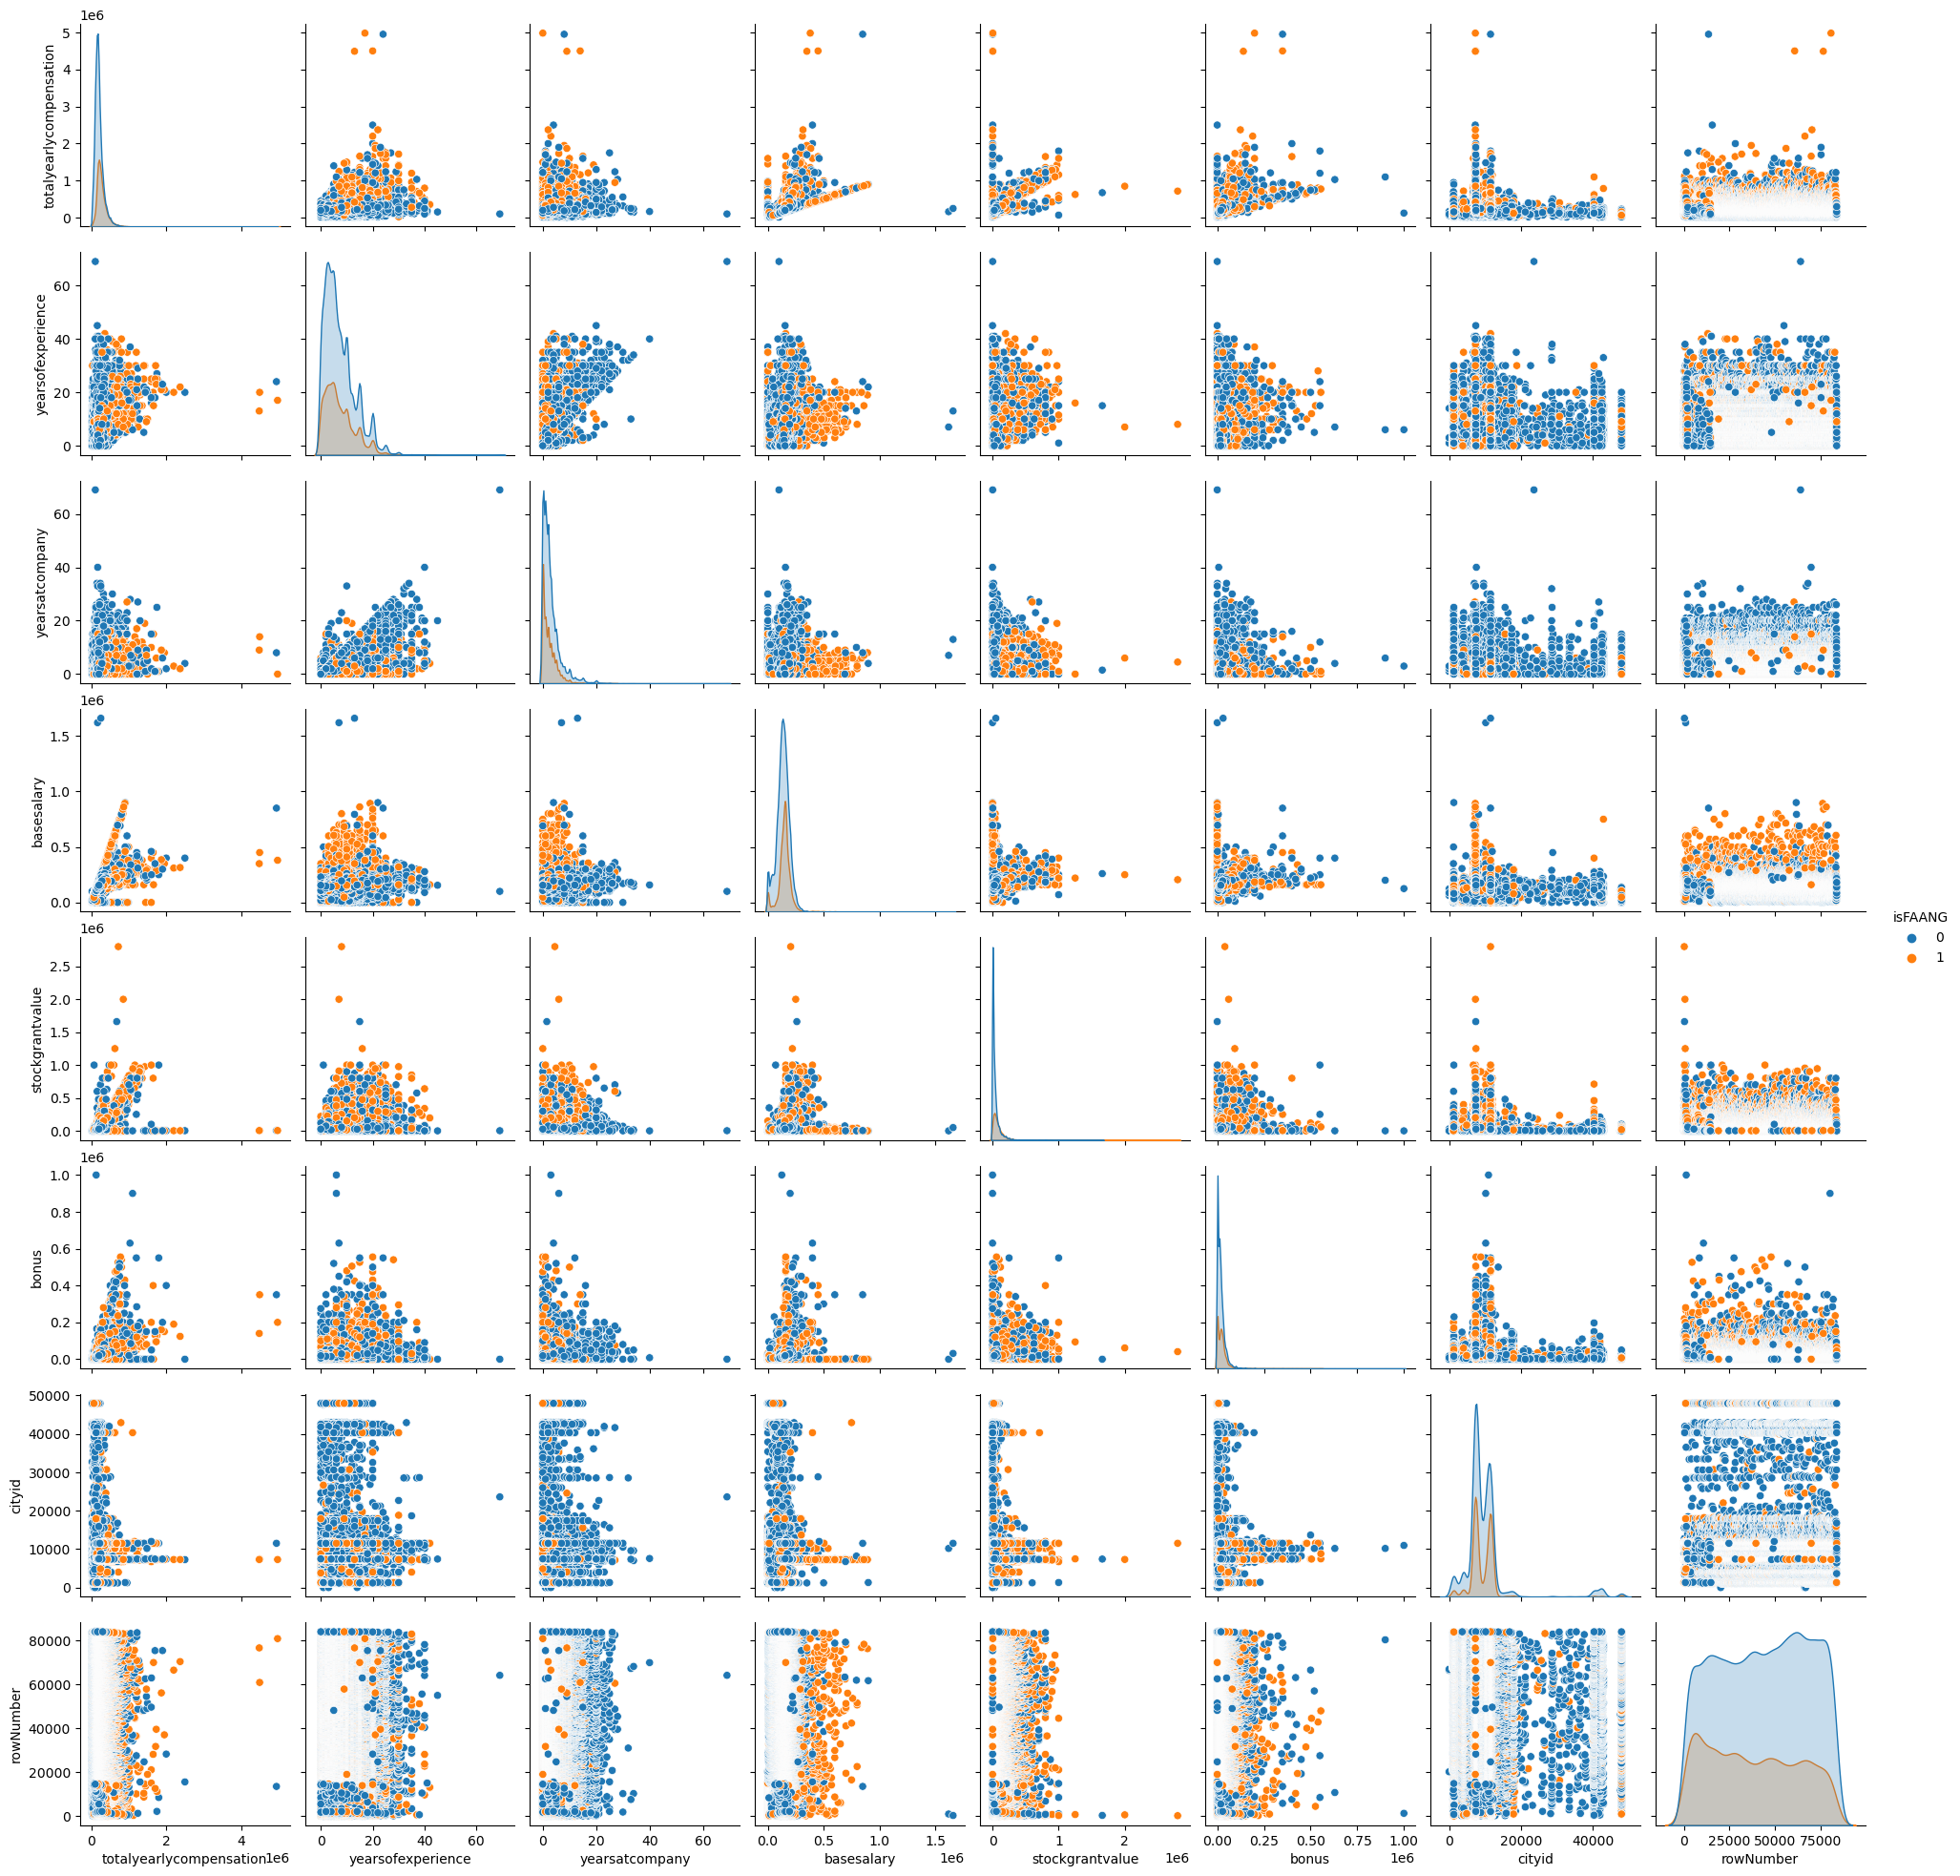

In [ ]:
df["isFAANG"] = df["company"].apply(lambda x: 1 if x in ["Facebook", "Apple", "Amazon", "Netflix", "Google"] else 0)
sns.pairplot(df.drop(columns=["timestamp", "dmaid", "Race_Asian", "Race_Black", "Race_Two_Or_More", "Race_Hispanic", "rownumber"
                              "Race_White", "Some_College", "Highschool", "Doctorate_Degree", "Bachelors_Degree", "Masters_Degree"])
            , hue="isFAANG")

<Axes: xlabel='totalyearlycompensation', ylabel='Density'>

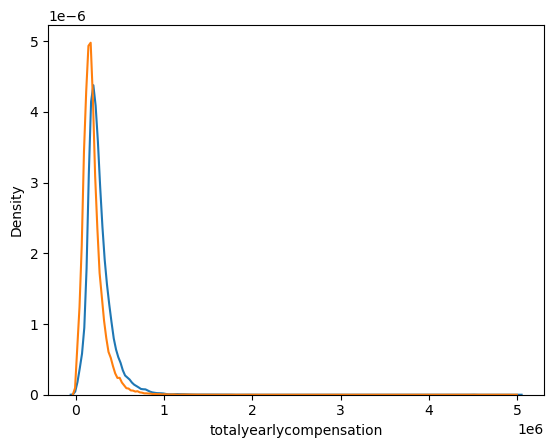

In [ ]:
df_fanng = df[df["isFAANG"] == 1]
df_not_fanng = df[df["isFAANG"] == 0]
sns.kdeplot(df_fanng["totalyearlycompensation"], label="FAANG")
sns.kdeplot(df_not_fanng["totalyearlycompensation"], label="Not FAANG")

### Rescaling

Sometimes when plotting it is useful to modify the scale of an axis of the data, to get something that is more useful or more graphable than the original. This is something that is common in machine learning and statistics in general. 

Probably the most useful scale trick is to use a logarithmic scale on an axis, which can allow us to see patterns and relationships in the data that don't show on a linear scale. In particular, data that is exponential becomes more straight and data that is log-normal, like income typically is, becomes more bell-curved. You can also do this by doing a transformation on the data, but this way is seamless and leaves your data as it is. 

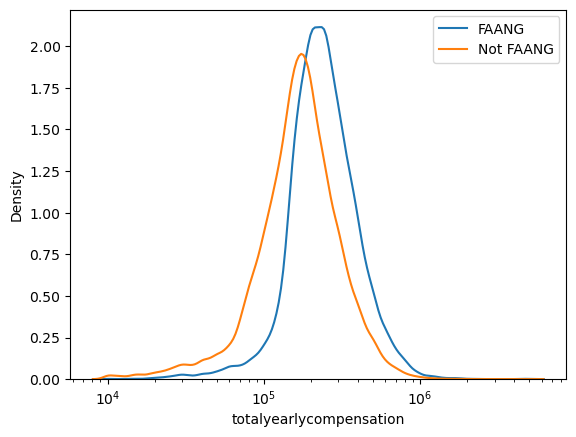

In [ ]:
sns.kdeplot(df_fanng["totalyearlycompensation"], label="FAANG", log_scale=True)
sns.kdeplot(df_not_fanng["totalyearlycompensation"], label="Not FAANG", log_scale=True)
plt.legend()

### Useful Plotting Notes

As you may notice with the pairplot, what gets plotted will vary depending on the datatype in that column of data. If your data is properly categorized in the dataframe, then everything will work properly. In many cases, this isn't true, especially when we have things like text values causing a numerical column to be treated as a string, or a T/F column with 0/1 that is treated as a number instead of a boolean. 

We can check column types and fix simple ones up front before going farther. It might also be useful to make a subset of data and plot that, especially if we have substantial data cleanup later and we just want to do some exploration prior to that.

In [ ]:
pd.set_option('display.max_columns', 50)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

In [ ]:
df[["Race_Asian", "Race_Black", "Race_Two_Or_More", "Race_White", "Some_College", "Highschool", "Doctorate_Degree"]] = df[["Race_Asian", "Race_Black", "Race_Two_Or_More", "Race_White", "Some_College", "Highschool", "Doctorate_Degree"]].astype(bool)
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.head()

timestamp    company level                         title  \
0 2017-06-07 11:33:27     Oracle    L3               Product Manager   
1 2017-06-10 17:11:29       eBay  SE 2             Software Engineer   
2 2017-06-11 14:53:57     Amazon    L7               Product Manager   
3 2017-06-17 00:23:14      Apple    M1  Software Engineering Manager   
4 2017-06-20 10:58:51  Microsoft    60             Software Engineer   

   totalyearlycompensation           location  yearsofexperience  \
0                   127000   Redwood City, CA                1.5   
1                   100000  San Francisco, CA                5.0   
2                   310000        Seattle, WA                8.0   
3                   372000      Sunnyvale, CA                7.0   
4                   157000  Mountain View, CA                5.0   

   yearsatcompany  tag  basesalary  stockgrantvalue    bonus gender  \
0             1.5  NaN    107000.0          20000.0  10000.0    NaN   
1             3.0  NaN         0.0              0.0      0.0    NaN   
2             0.0  NaN    155000.0              0.0      0.0    NaN   
3             5.0  NaN    157000.0         180000.0  35000.0    NaN   
4             3.0  NaN         0.0              0.0      0.0    NaN   

  otherdetails  cityid  dmaid  rowNumber  Masters_Degree  Bachelors_Degree  \
0          NaN    7392  807.0          1               0                 0   
1          NaN    7419  807.0          2               0                 0   
2          NaN   11527  819.0          3               0                 0   
3          NaN    7472  807.0          7               0                 0   
4          NaN    7322  807.0          9               0                 0   

   Doctorate_Degree  Highschool  Some_College  Race_Asian  Race_White  \
0             False       False         False       False       False   
1             False       False         False       False       False   
2             False       False         False       False       False   
3             False       False         False       False       False   
4             False       False         False       False       False   

   Race_Two_Or_More  Race_Black  Race_Hispanic Race Education  isFAANG  
0             False       False              0  NaN       NaN        0  
1             False       False              0  NaN       NaN        0  
2             False       False              0  NaN       NaN        1  
3             False       False              0  NaN       NaN        1  
4             False       False              0  NaN       NaN        0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                62642 non-null  datetime64[ns]
 1   company                  62637 non-null  object        
 2   level                    62523 non-null  object        
 3   title                    62642 non-null  object        
 4   totalyearlycompensation  62642 non-null  int64         
 5   location                 62642 non-null  object        
 6   yearsofexperience        62642 non-null  float64       
 7   yearsatcompany           62642 non-null  float64       
 8   tag                      61788 non-null  object        
 9   basesalary               62642 non-null  float64       
 10  stockgrantvalue          62642 non-null  float64       
 11  bonus                    62642 non-null  float64       
 12  gender                   43102 n

#### Cleaning Pairplots

We can make pairplots better by limiting the data in a few different ways. We can:
<ul>
<li> Ensure proper types in the dataframe. This will cause most things to work correctly right off the bat. </li>
<li> Limit the columns we plot. Things that are not numbers should be removed if you didn't with the type setting above. Also, things that have few values, like 1/0 bools, might be useful to remove. This is a great application of the drop() function. </li>
<li> Limit the rows we plot. We can use the sample() function to get a subset of the data, and plot that. This is useful if we have a lot of data because large data will slow a pairplot dramatically. Bigger samples are obviously better, but we can often get most of the value from a small number of rows being selected into a sample. We can pull out the stats textbooks to calcualte the margin of error, but we'll generally be limited by processing time, and we can just pick the most that will 'run in time'. </li>
</ul>

In [ ]:
sns.pairplot(df.drop(columns=["timestamp", "dmaid", "Race_Asian", "Race_Black", "Race_Two_Or_More", "Race_Hispanic", "isFAANG",
                              "Race_White", "Some_College", "Highschool", "Doctorate_Degree", "Bachelors_Degree", "Masters_Degree"]),
                hue="isFAANG")

NameError: name 'df' is not defined

#### Using Pairplots

Pairplots are very useful as a one-stop-shop exploration tool. Among other things, with one command we can see:
<ul>
<li> Relationships between variables. </li>
<li> Distributions of variables. </li>
<li> Outliers. </li>
<li> Missing data. </li>
<li> Coliniearity. </li>
</ul>

These are all values that can help guide our further actions in cleaning and preparing data.

### With Geopandas

The plots that we can generate with any plotting library, can be, for the most part, integrated with each other. This is true for Geopandas, and it allows for us to make and treat the visualizations from geopandas in the same way as any other plot. In particular, things like the grids are very useful in this way - we can easily place a map beside some other plot. 



In [ ]:
import geopandas as gpd

df_geo = pd.read_csv("../data/Alcohol_Sales_Licences.csv")
df_geo["Point"] = gpd.points_from_xy(df_geo["Longitude"], df_geo["Latitude"])
df_gpd_geo = gpd.GeoDataFrame(df_geo, geometry="Point")
df_geo.head()

Name Business Description  \
0                    CROMDALE LIQUOR STORE        Alcohol Sales   
1                        G & R LIQUOR MART                  NaN   
2      ACE LIQUOR DISCOUNTER AT SUMMERSIDE         Liquor Store   
3                   SAFEWAY WINE & SPIRITS  Retail Liquor Store   
4  ACE LIQUOR DISCOUNTER AT FOREST HEIGHTS         Liquor Store   

                                            Category    Zoning  \
0           Alcohol Sales (Consumption Off Premises)  RA7, CB2   
1           Alcohol Sales (Consumption Off Premises)       CMU   
2           Alcohol Sales (Consumption Off Premises)       CSC   
3  Alcohol Sales (Consumption Off Premises), Mino...       CSC   
4           Alcohol Sales (Consumption Off Premises)       DC2   

                 Address  Neighbourhood ID   Latitude   Longitude  \
0   11723 - 82 STREET NW              1160  53.569654 -113.466396   
1   9906 - 109 STREET NW              1090  53.537571 -113.508764   
2    1124 - 91 STREET SW              6214  53.423680 -113.475592   
3  12807 - 140 AVENUE NW              3340  53.601057 -113.542966   
4   7842 - 106 AVENUE NW              6230  53.549638 -113.448805   

                         Point  
0  POINT (-113.46640 53.56965)  
1  POINT (-113.50876 53.53757)  
2  POINT (-113.47559 53.42368)  
3  POINT (-113.54297 53.60106)  
4  POINT (-113.44881 53.54964)

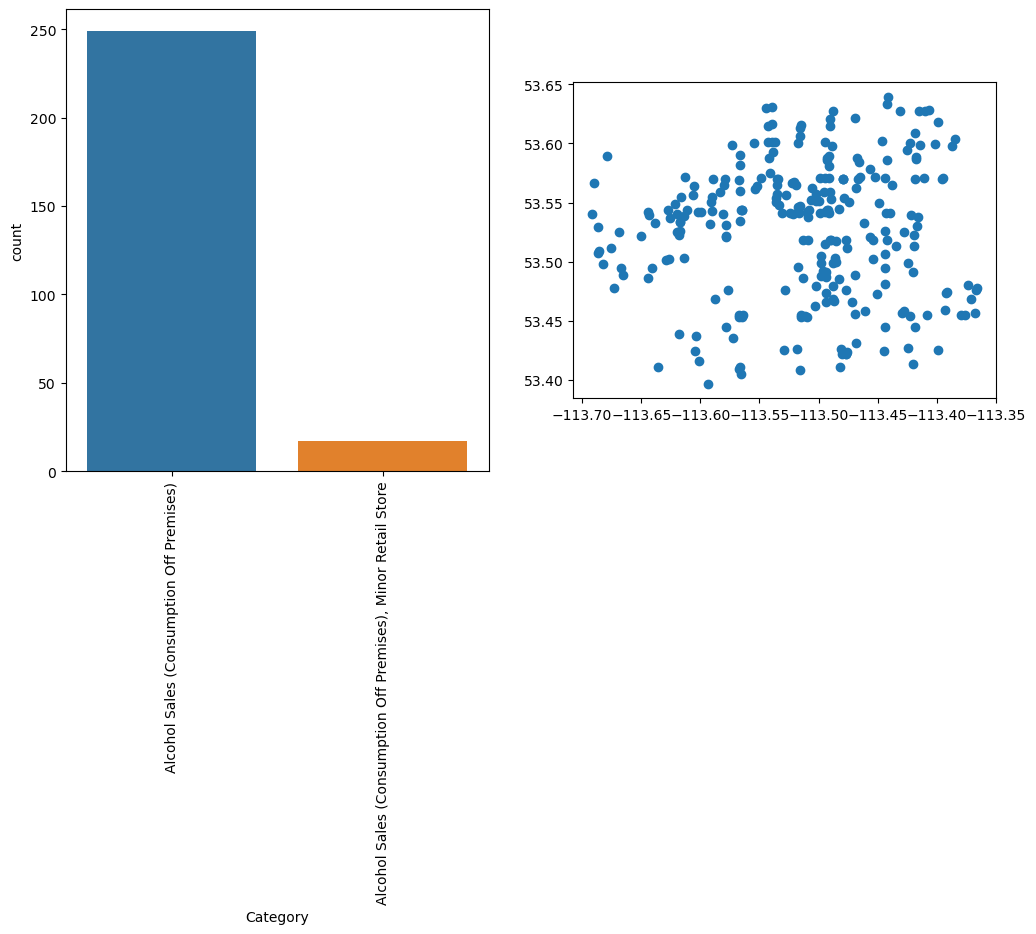

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
p1 = sns.countplot(data=df_geo, x='Category', ax=ax[0]) 
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
p2 = df_gpd_geo.plot(ax=ax[1], legend=True)

## Exercise

Add a base map to the plot of liquor stores above. 

In [ ]:
#

#### Heatmaps

Heatmaps are a very common way to visualize where something is high or low through color, and we use them in machine learning for things like correlation matrices.

NameError: name 'df' is not defined

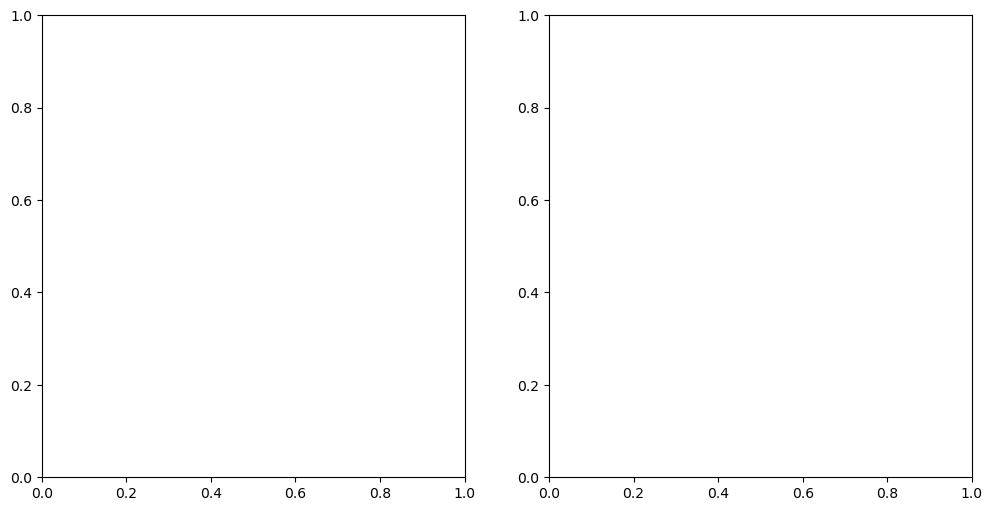

In [ ]:
df_corr = df[["yearsofexperience", "totalyearlycompensation", "basesalary", "stockgrantvalue", "bonus"]]
sns.heatmap(df_corr.corr(), annot=True)

Shockingly, the total compensation is more correlated with the stock grants than with the salary. Would this change if we filtered out high earners...?

<Axes: >

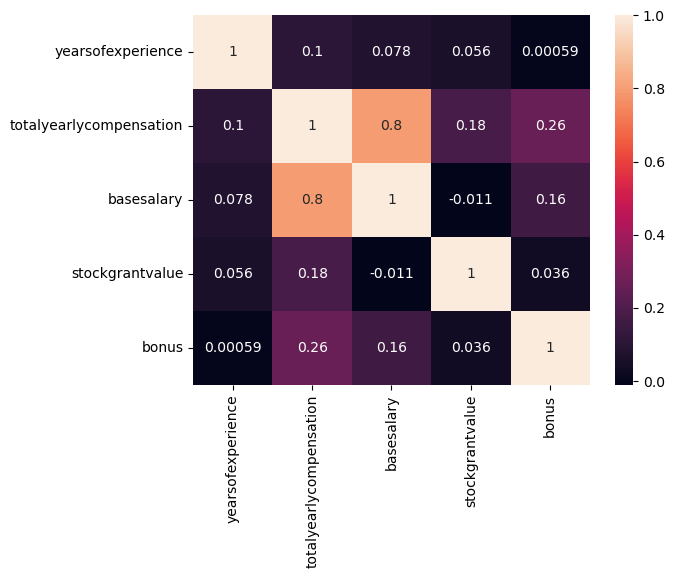

I guess maybe wages matter much more than stock options. 

### Ipywidgets

We can also use ipywidgets to make interactive plots, at least simple ones. For some things where we want to try different values one after another, this might be useful. For example, if you want to set an automatic threshold for filtering outliers, we can preview what will happen with a little plot. 

This example is a little basic, but the same concept will apply anywhere there's some input that we may want to set when generating a chart - filtering data, selecting the size of sample, testing different hyperparameters (~machine learning settings), etc. Instead of changing the code and rerunning, we can just change the input and see the result on the fly. 

In [ ]:
import ipywidgets as widgets

In [ ]:
def update_plot(std_dev, x_axis):
    tyc_std = df["totalyearlycompensation"].std()
    #lower_bound = df["totalyearlycompensation"].mean() - (std_dev * tyc_std)
    upper_bound = df["totalyearlycompensation"].mean() + (std_dev * tyc_std)
    sns.scatterplot(data=df, x=x_axis, y='totalyearlycompensation')
    #plt.axhline(lower_bound, color='g', linestyle='--', label="Lower Bound")
    plt.axhline(upper_bound, color='r', linestyle='--', label="Upper Bound")
    plt.legend()
    plt.show()

outlier_std_slider = widgets.FloatSlider(value=1, min=0, max=50, step=0.5, description='Outlier Std Dev:')
choose_x_axis = widgets.Dropdown(options=col_choices, description='X-axis')
widgets.interactive(update_plot, std_dev=outlier_std_slider, x_axis=choose_x_axis)

interactive(children=(FloatSlider(value=1.0, description='Outlier Std Dev:', max=50.0, step=0.5), Dropdown(des…

## Exercises

We'll do a few exercises to get some practice with Seaborn.

### Exercise 1

Make a plot to show the distribution of a subset of columns in a dataframe. Accept the subset of columns as an optional parameter, and default to all columns. Place the plots in a grid that defaults to 2 columns, but there is another optional parameter to set the number of columns to override this. Perform some error checking on this number of columns before using it. 

### Exercise 2

Make a discreet/numeric function that accepts a dataframe and prints a countplot for all columns that are discreet and a pairplot for all columns that are numeric.

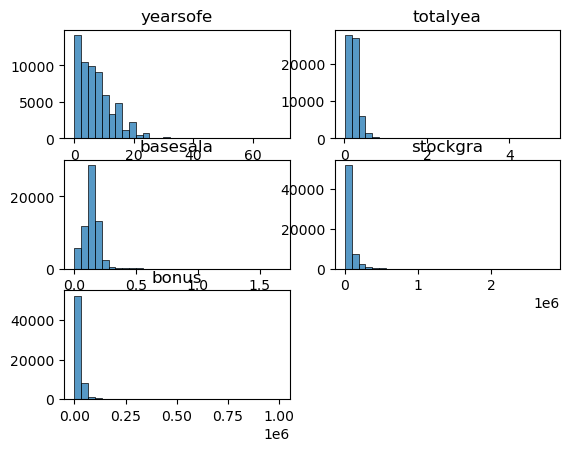

In [ ]:
def distPrinter(data, cols_to_plot=None, columns=2):
    if cols_to_plot is None:
        cols_to_plot = data.columns
    total_plots = len(cols_to_plot)
    
    for i, col in enumerate(cols_to_plot):
        plt.subplot(total_plots // columns + 1, columns, i+1)
        sns.histplot(data[col], bins=30)
        title_len = 8
        truncated_title = col if len(col) < title_len else col[:title_len]
        plt.title( truncated_title )
        plt.ylabel("")
        plt.xlabel("")

distPrinter(df, cols_to_plot=["yearsofexperience", "totalyearlycompensation", "basesalary", "stockgrantvalue", "bonus"], columns=2)

In [ ]:
NUMBINS = 30
TYPECUT = 10

def distOrCountplot(data, cols=None, columns=2):
    if cols is None:
        cols = data.columns
    
    # Set Columns
    total_plots = len(cols)
    if total_plots < columns:
        columns = total_plots
    
    # Set Rows    
    if total_plots % columns == 0:
        rows = total_plots // columns
    else:
        rows = total_plots // columns + 1
    

    fig, ax = plt.subplots(rows, columns)

    for i, col in enumerate(cols):
        row = i // columns
        col = i % columns
        typePlot = "histplot" if len(data[col].unique()) > TYPECUT else "countplot"
        if rows == 1:
            if typePlot == "histplot":
                sns.histplot(data[col], bins=NUMBINS, ax=ax[col])
            else:
                sns.countplot(data[col], ax=ax[col])
        else:
            if typePlot == "histplot":
                sns.histplot(data[col], bins=NUMBINS, ax=ax[row, col])
            else:
                sns.countplot(data[col], ax=ax[row, col])
    return fig

KeyError: 0

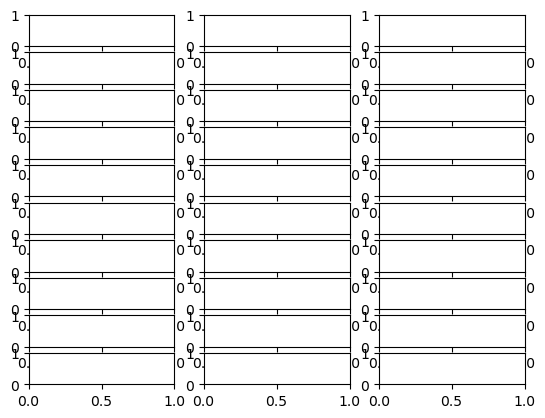

In [ ]:
distOrCountplot(df, columns=3)

## Exercise - Transformers, Pipes, and Plots

Try to make something that functions inside sklearn transformers that can then go into a pipeline. There are two goals here:
<ul>
<li> Print a pairplot for all numeric columns in the data. </li>
</ul>

Think about what you need to take in and return - remember, this could be called with anything coming before or after it in a pipe. This is pretty simple, but easy to mess up on because it isn't super intuitive.

<b>Note:</b> this is kind of weird, but a good mental exercise. We want to do something with the data (plot it), but we also need to ensure that we fit into the overall process of the pipeline, so things still work. 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

class DistPlotter(BaseEstimator, TransformerMixin):
    def __init__(self, ax=None):
        self.X = None
        self.numeric_cols = None
        self.ax = ax
    def fit(self, X, y=None):
        self.X = X
        self.numeric_cols = X.select_dtypes(include='number').columns
        return self
    def transform(self, X):
        if len(self.numeric_cols) >= 0:
            sns.kdeplot(X[self.numeric_cols], ax=self.ax, legend=False, log_scale=True)
            #plt.show()
        return X

/Users/akeem/anaconda3/envs/ml_env/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/p1/m8wtcgx57417hx9d_r110ctw0000gn/T/ipykernel_95167/1391580473.py:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(X[self.numeric_cols], ax=self.ax, legend=False, log_scale=True)
/var/folders/p1/m8wtcgx57417hx9d_r110ctw0000gn/T/ipykernel_95167/1391580473.py:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(X[self.numeric_cols], ax=self.ax, legend=False, log_scale=True)


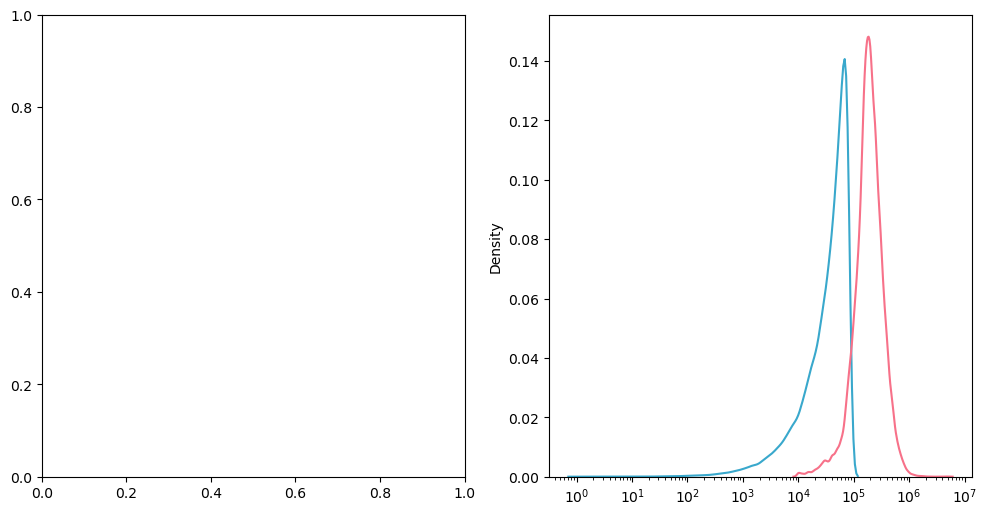

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

pipe1 = Pipeline([
    ('DistPlotter', DistPlotter(ax=ax[1]))
])
pipe1.fit_transform(df)
plt.show()